Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


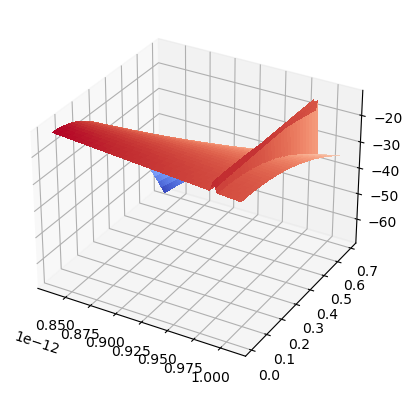

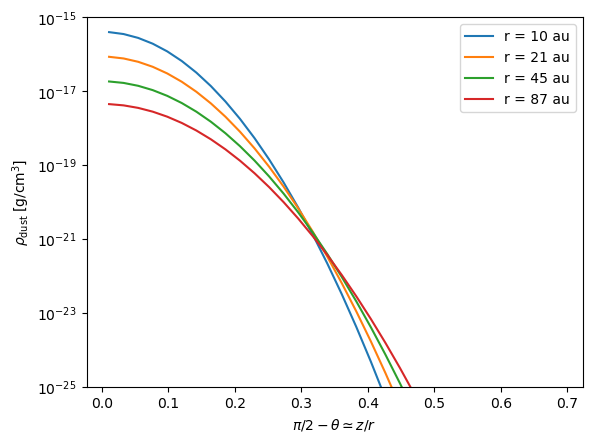

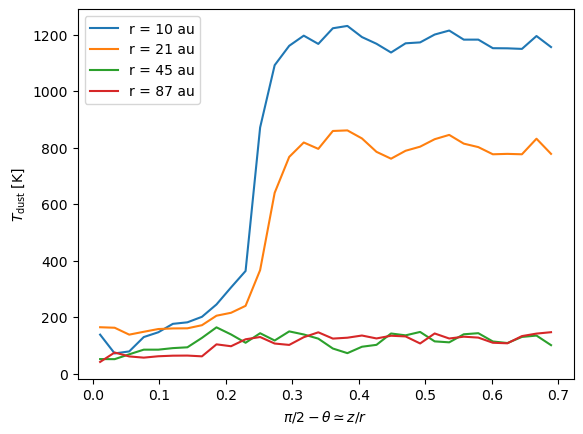

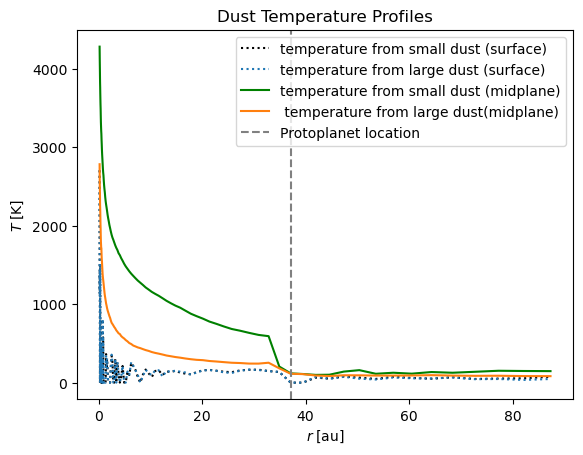

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\326146662.py:83: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), label='temperature from small dust (midplane)', color='green')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\326146662.py:84: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), label=' temperature from large dust(midplane)', color='C1')


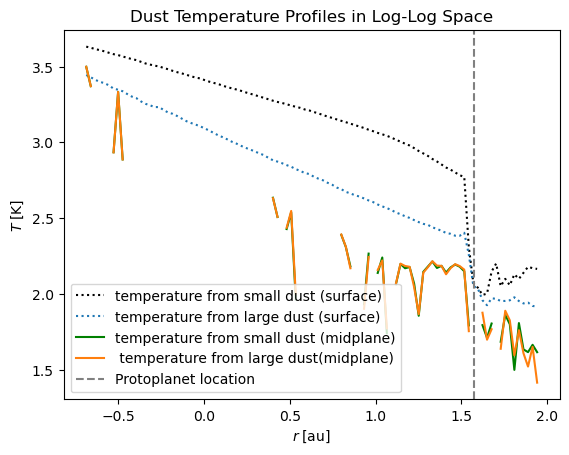

In [ ]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt
rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, 30, 0,0], ':', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, 30, 0,1], ':', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]), ':', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]), ':', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()


In [19]:
print(d.dusttemp[20, :, 0,0])

[2901.35140097 3001.35188348 2900.45545783 2909.52701408 2895.98153265
 2971.17537413 2974.70719136 3038.40368132 2983.62560246 2945.7207142
 2934.35255335 2863.77192522 2938.72683874 2982.99667746 3032.8866975
 3040.42120325 2921.44689692 2970.16644301 2935.88115122 2892.52784103
 2935.06748104 2756.00738836 1766.00108614 1482.33115958 1012.56800684
  888.52836647  566.35020402    0.          414.99735806  527.98724332
  194.19369256    0.        ]


The shape of x is (100, 200)
The shape of y is (100, 200)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\1694795816.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


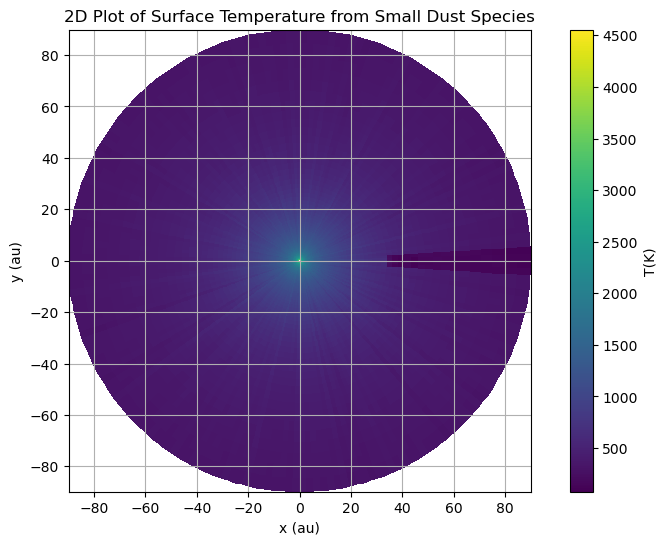

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\1694795816.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


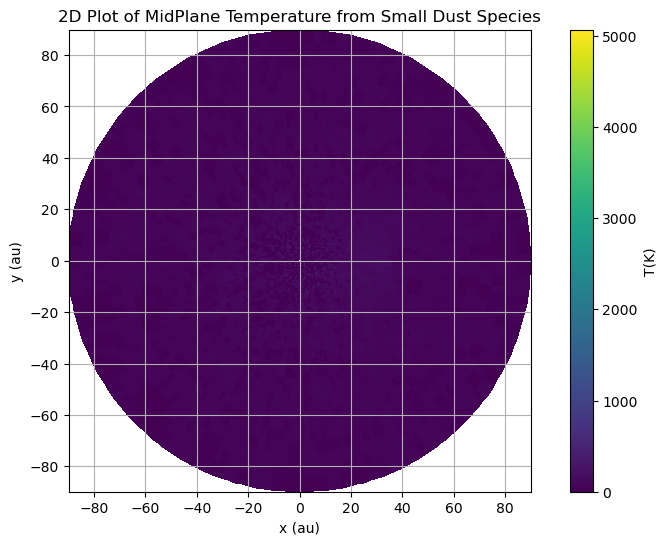

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\1694795816.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


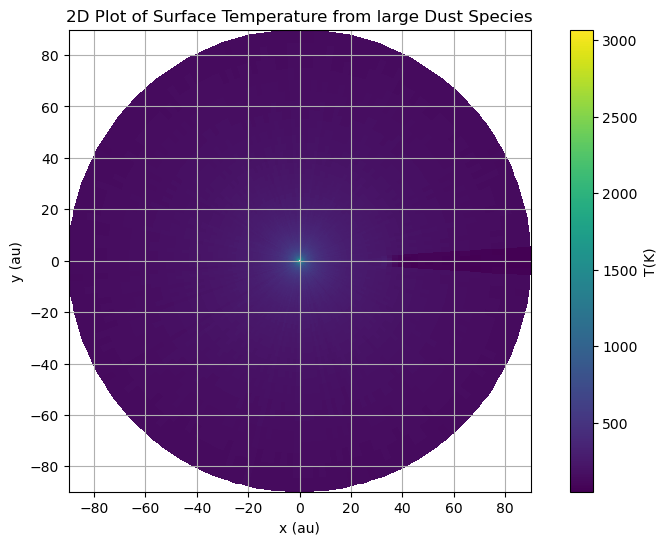

C:\Users\LHEM\AppData\Local\Temp\ipykernel_20048\1694795816.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


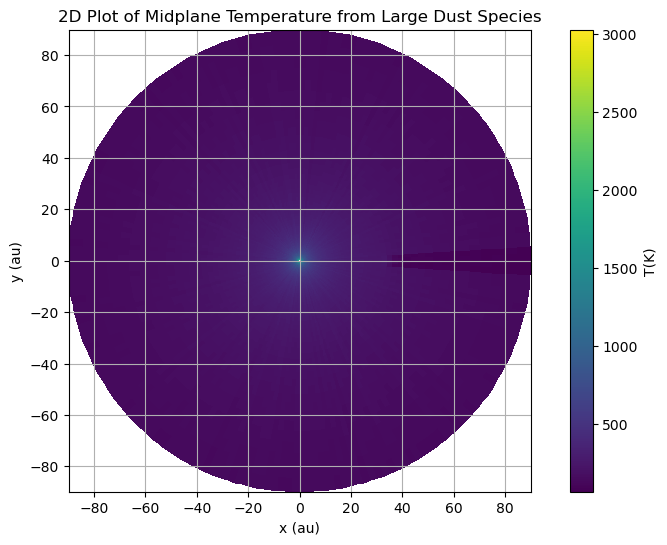

In [11]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, 15, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, 15, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 1, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


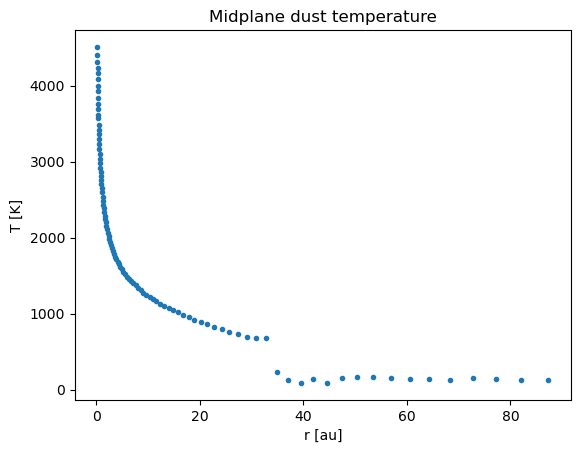

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


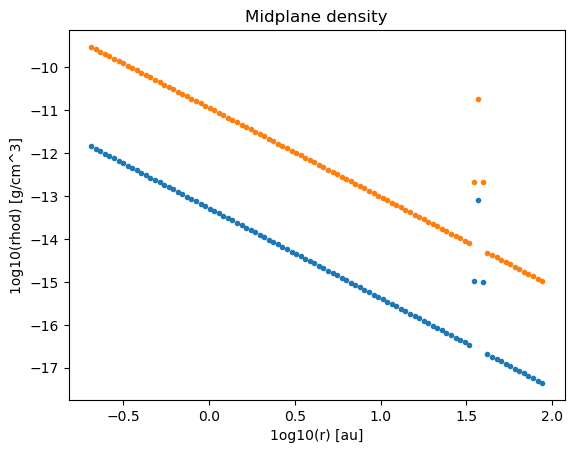

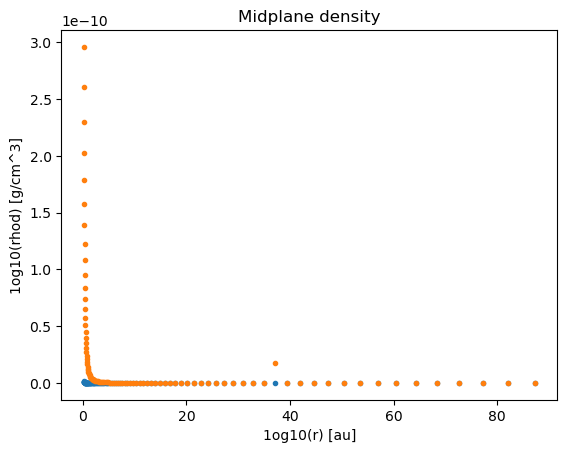

In [3]:
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import numpy as np
import math
import os

from radmc3dPy.analyze import *  
from radmc3dPy.natconst import * 

#
# First set up the model with
#
#   python problem_setup.py
#
# Then make sure to have run
#
#   radmc3d mctherm
#
#os.system('radmc3d mctherm')
#
# to compute the dust temperature before you run this plotting session.
#
# Now plot the temperature profile
#
a    = readData()
r    = a.grid.x[:]
temp = a.dusttemp[:,15,0,0]  #r,theta, phi, last one is pick the first dust species
# shape should be cosistent for different layers
plt.figure()
plt.plot(r/au,temp,'.')
plt.xlabel('r [au]')
plt.ylabel('T [K]')
plt.title('Midplane dust temperature')
plt.show()

#
a    = readData()
r    = a.grid.x[:]
rhodsm = a.rhodust[:,-1,0,0]  #r,theta, phi, last one is pick the zeroth orfirst dust species
rhodbg = a.rhodust[:,-1,0,1]
# shape should be cosistent for different layers
plt.figure()
plt.plot(np.log10(r/au),np.log10(rhodsm),'.')
plt.plot(np.log10(r/au),np.log10(rhodbg),'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


plt.figure()
plt.plot(r/au,rhodsm,'.')
plt.plot(r/au,rhodbg,'.')
plt.xlabel('1og10(r) [au]')
plt.ylabel('1og10(rhod) [g/cm^3]')
plt.title('Midplane density')
plt.show()


In [1]:
# 2D midplane/Surface temperature plot

r_grid, phi_grid = np.meshgrid(rr_slice[:, 0], pp_slice[0, :])

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')


# Create a 2D plot of sigmad vs x, y
plt.figure(figsize=(10, 6))
plt.pcolormesh(rr_slice/au, pp_slice, np.log10(sigmad_slice), shading='auto', cmap='viridis')
plt.colorbar(label='log10(sigmad)')
plt.xlabel('r(au)')
plt.ylabel('phi (rad)')
plt.title('2D Plot of sigmad')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, np.log(sigmad_slice.T), shading='auto', cmap='viridis')
plt.colorbar(label=r'$\log_{10}(\Sigma_{\mathrm{d}}) \, (\mathrm{g/cm^2})$')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Density')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

In [2]:
# Read to FITS information

from astropy.io import fits
from astropy.table import Table

# Path to the FITS file
fits_file_path = 'CPD_PPD_PDS70.fits'

# Open the FITS file and read the header
with fits.open(fits_file_path) as hdul:
    # Access the primary HDU (Header/Data Unit)
    primary_hdu = hdul[0]
    
    # Get the header
    header = primary_hdu.header

# Convert the header to a table
header_items = list(header.items())
header_table = Table(rows=header_items, names=['Keyword', 'Value'])

# Print the table
print(header_table)

Keyword        Value        
------- --------------------
 SIMPLE                 True
 BITPIX                  -64
  NAXIS                    3
 NAXIS1                  100
 NAXIS2                  100
 NAXIS3                    1
 EXTEND                 True
 CRPIX1                 50.5
 CDELT1 -4.8671880573703e-06
 CRVAL1   212.04166666666666
    ...                  ...
 CDELT3         2000000000.0
 CRVAL3       149896229000.0
 CUNIT3                   HZ
 CTYPE3             FREQ-LSR
RESTFRQ       149896229000.0
  BUNIT             JY/PIXEL
  BTYPE            INTENSITY
  BZERO                  0.0
 BSCALE                  1.0
  EPOCH               2000.0
LONPOLE                180.0
Length = 29 rows
